In [8]:
%load_ext autoreload
%autoreload 2
# example_notebook.ipynb
from orca_tools import OrcaNotebookCalculator, OrcaConfig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
XC = 'B3LYP'
Basis = '6-31G'
Nroot = 3
Charge = 0
Multiplicity = 1
Geom = '''
  C       1.293604      0.000099     -0.723163
  C       0.000000     -0.000185      0.077735
  C      -1.293604      0.000097     -0.723163
  O       0.000001     -0.000687      1.293566
  H      -2.149624      0.000458     -0.045036
  H      -1.341475      0.881171     -1.376201
  H      -1.341976     -0.881295     -1.375750
  H       1.341480      0.881182     -1.376189
  H       2.149624      0.000447     -0.045036
  H       1.341970     -0.881285     -1.375760
'''

Working directory: /tmp/tmpo4mo9gl0
Generated ORCA input:
!B3LYP 6-31G*
%tddft
  nroots 3
end
*xyz 0 1
C       1.293604      0.000099     -0.723163
  C       0.000000     -0.000185      0.077735
  C      -1.293604      0.000097     -0.723163
  O       0.000001     -0.000687      1.293566
  H      -2.149624      0.000458     -0.045036
  H      -1.341475      0.881171     -1.376201
  H      -1.341976     -0.881295     -1.375750
  H       1.341480      0.881182     -1.376189
  H       2.149624      0.000447     -0.045036
  H       1.341970     -0.881285     -1.375760
*

Running ORCA calculation in /tmp/tmpo4mo9gl0
/tmp/tmpo4mo9gl0/orca.out
Mode is ABS
Using eV units
ABS (1) spectra detected ...
----------------------------------
Plotting ABS Spectrum 0
----------------------------------
Cannot read the paras.inp file ... 
    taking the line width parameter from the command line 
Number of peaks            ...   3
Start energy [eV]          ...     1.50
Stop energy [eV]           ...    1

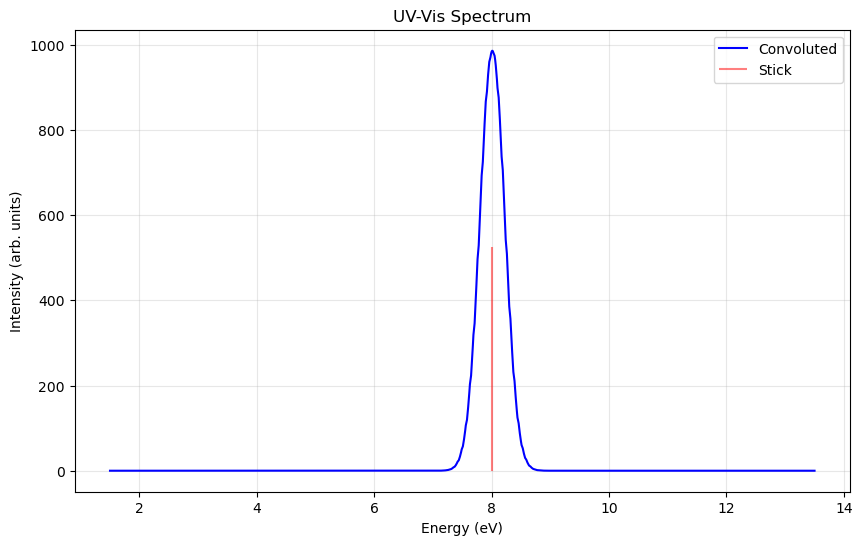

In [10]:
# Set up calculator with a specific working directory
config = OrcaConfig(
    work_dir=None,
    verbose=True
)

with OrcaNotebookCalculator(config=config, orca_path = "/home/huangm/source/orca_6_0_1_linux_x86-64_shared_openmpi416/") as calc:
    # Run calculation
    input_content = calc.generate_input(
        xc=XC,
        basis=Basis,
        nroot=Nroot,
        charge=Charge,
        multiplicity=Multiplicity,
        geometry=Geom
    )
    
    inp_file, out_file = calc.run_calculation(input_content)

    print(out_file)
    
    # Generate spectrum - this will preserve the files
    spectrum_data = calc.generate_spectrum(out_file, type = "abs", unit = "eV",  start_point=1.5, end_point =13.5)
    
    # Plot spectrum - files are guaranteed to exist
    calc.plot_spectrum()
    
    # Optionally save everything to a permanent location
    #calc.save_working_dir("./permanent_results")